In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [11]:
heart = pd.read_csv('heart_disease.csv')
print(heart.head())

    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1  67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  


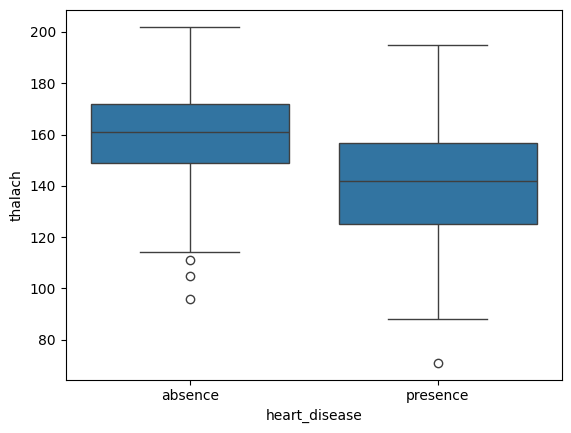

In [12]:
sns.boxplot(x=heart.heart_disease, y=heart.thalach)
plt.show()

In [13]:
thalach_hd = heart.thalach[heart.heart_disease == 'presence']

thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

diff_mean_thalach = np.mean(thalach_hd) - np.mean(thalach_no_hd)
print(f'Difference in mean values: {diff_mean_thalach}')

diff_median_thalach = np.median(thalach_hd) - np.median(thalach_no_hd)
print(f'Difference in median values: {diff_median_thalach}')

tstat,pval = ttest_ind(thalach_hd, thalach_no_hd)
print('p-value for [thalach] two-sample t-test: ', pval)

Difference in mean values: -19.11905597473242
Difference in median values: -19.0
p-value for [thalach] two-sample t-test:  3.456964908430172e-14


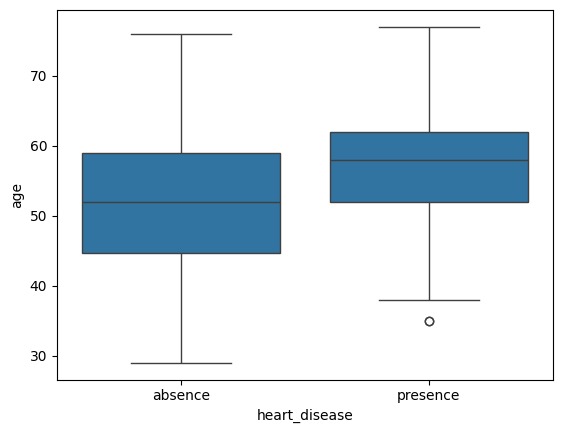

In [14]:
#age association to heart disease

plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.age)
plt.show()

In [15]:
age_hd = heart.age[heart.heart_disease == 'presence']
age_no_hd = heart.age[heart.heart_disease == 'absence']
mean_diff = np.mean(age_hd) - np.mean(age_no_hd)
print(f'Difference in mean values: {mean_diff}')
med_diff = np.median(age_hd) - np.median(age_no_hd)
print(f'Difference in median values: {med_diff}')
tstat, pval = ttest_ind(age_hd, age_no_hd)
print('p-value for [age] two-sample t-test: ', pval)

Difference in mean values: 4.040533426917001
Difference in median values: 6.0
p-value for [age] two-sample t-test:  8.955636917529706e-05


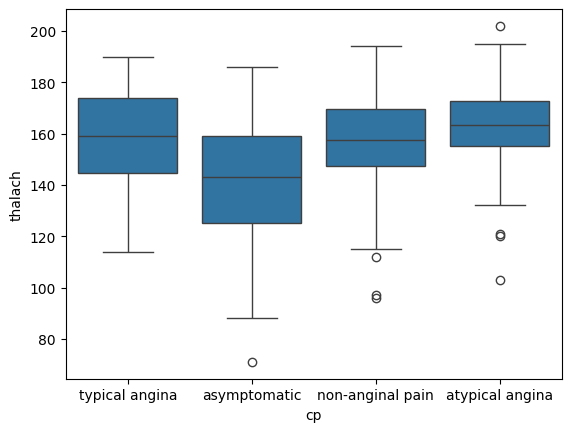

In [16]:
#Chest Pain and Max Heart Rate

plt.clf()
sns.boxplot(x=heart.cp, y=heart.thalach)
plt.show()

In [18]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

Fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print('p-value for ANOVA: ', pval)

p-value for ANOVA:  1.9065505247705008e-10


In [19]:
#Tukey's range test
output = pairwise_tukeyhsd(heart.thalach, heart.cp)
print(output)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


In [21]:
# contingency table of heart disease vs cp
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)

#chi-square test
from scipy.stats import chi2_contingency
chi2, pval, dof, exp = chi2_contingency(Xtab)
print('p-value for chi-square test: ', pval)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7
p-value for chi-square test:  1.2517106007837527e-17
